In [1]:
from keras.models import load_model
import numpy as np
import time
import pickle
from keras.preprocessing import image
import numpy as np
import pickle
import cv2
from os import listdir
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array
import cv2
from os import listdir

Using TensorFlow backend.
C:\Anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\d

In [2]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 8
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3
custom_config=tf.ConfigProto(log_device_placement=True, allow_soft_placement=True)
custom_config.gpu_options.allocator_type = 'BFC'
custom_config.gpu_options.per_process_gpu_memory_fraction = 0.90

In [3]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
directory_root = 'Validation wtih full knowledge'
disease_types=['Pepper_bell Bacterial_spot' ,'Pepper_bell healthy'
, 'Potato Early_blight', 'Potato Late_blight' ,'Potato healthy'
 ,'Tomato Bacterial_spot', 'Tomato Early_blight', 'Tomato Late_blight'
 ,'Tomato Leaf_Mold' ,'Tomato Septoria_leaf_spot'
 ,'Tomato Spider_mites_Two_spotted_spider_mite' ,'Tomato Target_Spot'
 ,'Tomato Tomato_YellowLeaf__Curl_Virus', 'Tomato Tomato_mosaic_virus'
 ,'Tomato healthy']

In [5]:
listdir(directory_root)

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [6]:
model_disease=load_model("cnn_model.h5")


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



The Detected Plant is:  Pepper_bell
The Detected Disease is:  Bacterial_spot
Confidence: 0.8086577
Time Taken To Detect:  236 ms


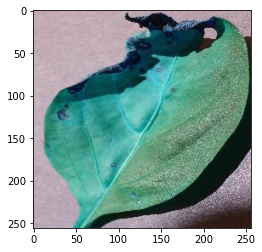

In [13]:
then=time.time()
image_dir="Validation wtih full knowledge/Pepper__bell___Bacterial_spot/test (4).JPG"
image=cv2.imread(image_dir)
plt.imshow(image)

im=convert_image_to_array(image_dir)
im = np.array(im, dtype=np.float16) / 225.0
im = np.expand_dims(im, axis=0)

result=model_disease.predict(im)

itemindex = np.where(result==np.max(result))
p_d=disease_types[itemindex[1][0]]

pl=p_d.split()[0]

di=' '.join(p_d.split()[1:])

print('The Detected Plant is: ',pl)
print('The Detected Disease is: ',di)
print("Confidence: "+str(np.max(result)))
print('Time Taken To Detect: ',int((time.time()-then)*1000),'ms')

The Detected Plant is:  Tomato
The Detected Disease is:  Late_blight
Confidence: 0.60978264
Time Taken To Detect:  218 ms


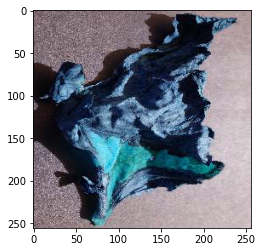

In [14]:
then=time.time()
image_dir="Validation with plants known/Tomato/test (22).JPG"
image=cv2.imread(image_dir)
plt.imshow(image)

im=convert_image_to_array(image_dir)
im = np.array(im, dtype=np.float16) / 225.0
im = np.expand_dims(im, axis=0)

result=model_disease.predict(im)

itemindex = np.where(result==np.max(result))
p_d=disease_types[itemindex[1][0]]

pl=p_d.split()[0]

di=' '.join(p_d.split()[1:])

print('The Detected Plant is: ',pl)
print('The Detected Disease is: ',di)
print("Confidence: "+str(np.max(result)))
print('Time Taken To Detect: ',int((time.time()-then)*1000),'ms')

The Detected Plant is:  Tomato
The Detected Disease is:  Tomato_YellowLeaf__Curl_Virus
Confidence: 0.9993586
Time Taken To Detect:  227 ms


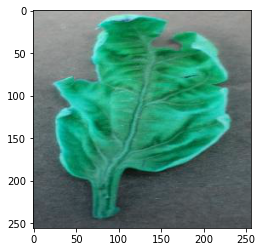

In [15]:
then=time.time()
image_dir="Validation with plants not known/test (188).jpg"
image=cv2.imread(image_dir)
plt.imshow(image)

im=convert_image_to_array(image_dir)
im = np.array(im, dtype=np.float16) / 225.0
im = np.expand_dims(im, axis=0)

result=model_disease.predict(im)

itemindex = np.where(result==np.max(result))
p_d=disease_types[itemindex[1][0]]

pl=p_d.split()[0]

di=' '.join(p_d.split()[1:])

print('The Detected Plant is: ',pl)
print('The Detected Disease is: ',di)
print("Confidence: "+str(np.max(result)))
print('Time Taken To Detect: ',int((time.time()-then)*1000),'ms')